Text(0.5, 0, 'Frecuencia')

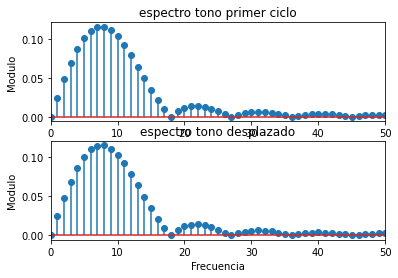

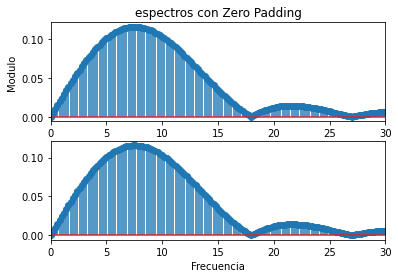

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

##############################################################################
def generador_senoidal (fs, f0, N, a0, p0):
   
    tt=np.arange(N/fs , step=1/fs)
    signal = a0 * np.sin( 2 * np.pi * f0 * tt + p0 )
     
    return tt, signal   

##############################################################################

N  = 1000         
fs = 1000        
df=fs/N                   

a0 = 1 # Volts
p0 = 0#np.pi/4  #radianes. 
Norma = N/2
f0 =9 * fs/N

Npad = N*4

#############################################################################

#  xx : Un ciclo de la senoidal de frecuencia f0 = 9 
#  xx1 : Mismo ciclo desplazado
#  xx2 : xx con zero padding
#  xx3 : xx1 con zero padding

##########################################################################


tt , xx = generador_senoidal(fs , f0 , N , a0 , p0)
xx[int(1*fs/f0):] = 0  #  como si tomara un numero de muestras N=fs/f0 y aplico la tecnica Zero Padding llenando 
                            #  con ceros luego del primer ciclo
                            #  N = 1000
xx2 = np.concatenate((xx,np.zeros(Npad))) # Utilizo Zero Paddinng para ganar resolucion y comprobar
                                          # Posibles diferencias

fftxx = fft(xx)
fftxx_abs = np.abs(fftxx)/Norma
freq = np.arange( 0 , fs , fs/N)

fftxx2 = fft(xx2)
fftxx2_abs = np.abs(fftxx2)/Norma
freq2 = np.fft.fftfreq(len(xx2),1/N)

###########################################################################

tt , xx1 = generador_senoidal(fs , f0 , N , a0 , p0)
xx1[:int(2*N/f0)] = 0
xx1[int(3*N/f0):] = 0
xx3 = np.concatenate((xx1,np.zeros(Npad)))

fftxx1 = fft(xx1)
fftxx1_abs = np.abs(fftxx1)/(Norma)
#freq1 = np.arange( 0 , fs , fs/N)

fftxx3 = fft(xx3)
fftxx3_abs = np.abs(fftxx3)/Norma
freq3 = np.fft.fftfreq(len(xx3),1/N)


#############################################################################

plt.figure(1)
plt.subplot(211)
plt.stem(freq , fftxx_abs , use_line_collection=True)
plt.xlim(0,50)
plt.ylabel('Modulo')
plt.title('espectro tono primer ciclo')

plt.subplot(212)
plt.stem(freq , fftxx1_abs , use_line_collection=True)
plt.xlim(0,50)
plt.ylabel('Modulo')
plt.xlabel('Frecuencia')
plt.title('espectro tono desplazado')

plt.figure(2)
plt.subplot(211)
plt.stem(freq2 , fftxx2_abs , use_line_collection=True)
plt.xlim(0,30)
plt.title('espectros con Zero Padding')
plt.ylabel('Modulo')

plt.subplot(212)
plt.stem(freq3 , fftxx3_abs , use_line_collection=True)
plt.xlim(0,30)
plt.xlabel('Frecuencia') 


In [ ]:
# NO SE OBSERVAN MODIFICACION EN LOS ESPECTROS POR VARIACION EN LA OCURRENCIA